In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 15 ##

## Probability ##

In [3]:
# Discussion Question (a):
# P(Rick and Morty both appear)
# Rick first, then Morty + Morty first, then Rick
(1/100)*(1/99) + (1/100)*(1/99)
# 0.02% probability of us selecting Rick and Morty in our sample, 
#from our original population of 100

0.00020202020202020205

In [6]:
# Discussion Question (b)
# P(neither Rick nor Morty appears)
(98/100) *(97/99) #+ (98/100) *(97/99)
#96% probability of us selecting neither Rick nor Morty in our sample

0.9602020202020202

## Random Sampling ##

In [7]:
united = Table.read_table('data/united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [8]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [9]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [10]:
united.take(make_array(34, 6321, 10040))

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


In [11]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
598,6/4/15,1975,FLL,22
1598,6/11/15,1474,DEN,-4
2598,6/18/15,587,SNA,25
3598,6/24/15,1927,IAH,12
4598,7/1/15,1532,EWR,-3
5598,7/8/15,1526,SEA,129
6598,7/15/15,569,AUS,-7
7598,7/21/15,1684,LIH,-1
8598,7/28/15,705,ORD,-4
9598,8/3/15,1721,KOA,37


## Distributions ##

In [12]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [13]:
die.sample(10) # sample size = 10
# when we use sample function, default is to sample with replacement

Face
6
4
4
5
5
6
6
5
3
4


In [14]:
help(Table.sample)

Help on function sample in module datascience.tables:

sample(self, k=None, with_replacement=True, weights=None)
    Return a new table where k rows are randomly sampled from the
    original table.
    
    Args:
        ``k`` -- specifies the number of rows (``int``) to be sampled from
           the table. Default is k equal to number of rows in the table.
    
        ``with_replacement`` -- (``bool``) By default True;
            Samples ``k`` rows with replacement from table, else samples
            ``k`` rows without replacement.
    
        ``weights`` -- Array specifying probability the ith row of the
            table is sampled. Defaults to None, which samples each row
            with equal probability. ``weights`` must be a valid probability
            distribution -- i.e. an array the length of the number of rows,
            summing to 1.
    
    Raises:
        ValueError -- if ``weights`` is not length equal to number of rows
            in the table; or, if ``weig

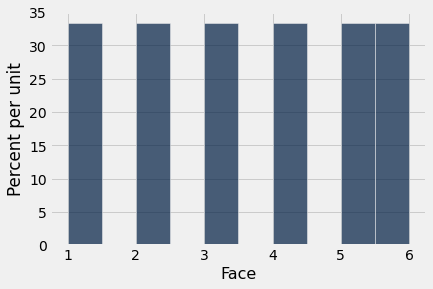

In [15]:
die.hist()

In [16]:
roll_bins = np.arange(0.5, 6.6, 1)

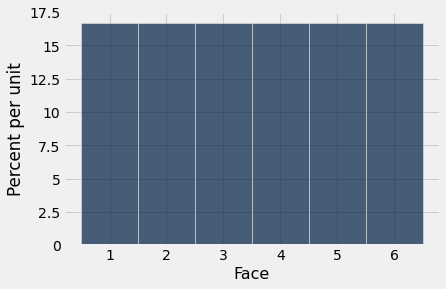

In [17]:
die.hist(bins=roll_bins)

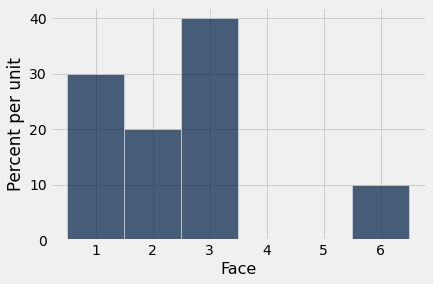

In [18]:
die.sample(10).hist(bins=roll_bins)

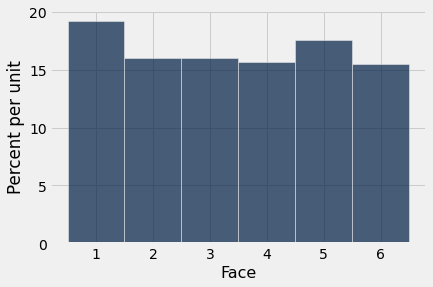

In [19]:
die.sample(1000).hist(bins=roll_bins)

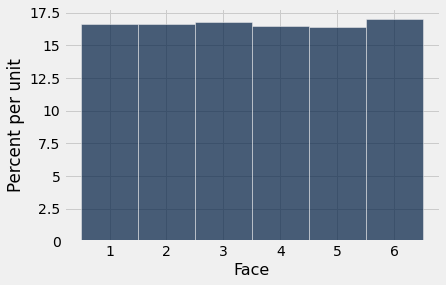

In [20]:
die.sample(100000).hist(bins=roll_bins)

## Large Random Samples ##

In [21]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


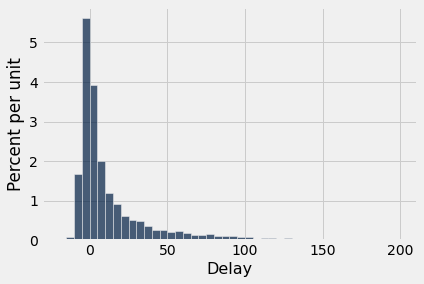

In [22]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [23]:
min(united.column('Delay'))

-16

In [24]:
max(united.column('Delay'))

580

In [25]:
np.average(united.column('Delay'))

16.658155515370705

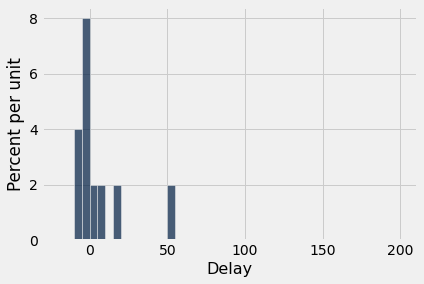

In [26]:
united.sample(10).hist('Delay', bins = united_bins)

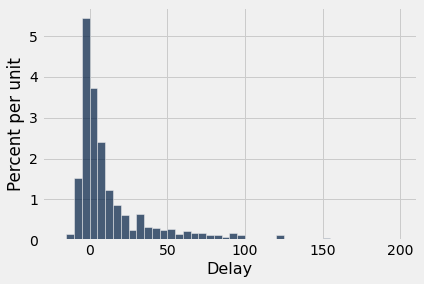

In [27]:
united.sample(1000).hist('Delay', bins = united_bins)

In [40]:
sample_10 = united.sample(10)
np.average(sample_10.column('Delay'))

54.5

In [39]:
sample_1000 = united.sample(1000)
np.average(sample_1000.column('Delay'))

15.595

## Simulating Statistics ##

In [ ]:
# (1, 2, 3)
#mean = median = 2


In [43]:
#(1, 2, 100)
#median = 2
#mean = 
(1+2+100)/3

34.333333333333336

In [41]:
np.median(united.column('Delay'))

2.0

In [42]:
np.mean(united.column('Delay'))
# mean is larger than our median, which demonstrates our larger outliers
# very late planes

16.658155515370705

In [44]:
np.median(united.sample(10).column('Delay'))

4.0

In [45]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [46]:
sample_median(10)

6.0

In [51]:
sample_median(100000)

2.0

In [52]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

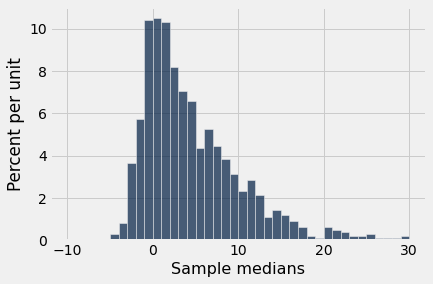

In [53]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [54]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

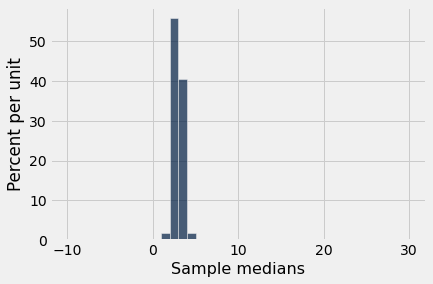

In [55]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))